<a href="https://colab.research.google.com/github/Pranabm1987/Avighna/blob/master/Ascend_Pro_Assessment_ML_Basics_31_01_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


### Step1: Loading the Data  ###

In [ ]:
Y_train =pd.read_csv('/content/train_AvX1lTZ.csv')

In [ ]:
df_train = Y_train.copy()
# making a copy of train data

In [ ]:
X_test = pd.read_csv('/content/test_tERCnnc.csv')

In [ ]:
df_test = X_test.copy()
# making a copy of test data

In [ ]:
Y_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


#### We will have look at the Shape of the Data .i.e Number of rows and columns ###

In [ ]:
Y_train.shape

(43400, 12)

*** So There are 43400 rows and 12 columns in the train file ***

In [ ]:
X_test.shape

(18601, 11)

In [ ]:
X_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


** Approaching the ML problem **
 ###  1 . Load the Data    ###
  ### 2.** EDA (Exploratory Data Analysis)** with the intention to identify the " problem in the Data" ###

  ### 2a.Finding the features having lots of Missing values , Outliers.###
   ### 2b. Checking if the output Var is significantly " imbalanced" ###
  ### 2c. Checking for **multicollinearity** in the data. ###
###   2d . Checking for redundant Features, features with (lots of) constant values, categorical features with large number of unique values. ####

### 3. Data Cleaning : missing value removal , Outliers ,..etc ###
### 4. Dimentionality Reduction : Feature Selection or Feature Extraction ###

### 5. Feature scaling & Transformation Scaling : MinmaxScalar , StandardScalar , Normalizer,
Numerical Transformation :powertransform , log, sqrt,  Categorical Trans: Label Encoding or  One Hot Encoding 

### 6. Creating the baseline model:

Train-test-Split








###

### Now we will start with 
** EDA ** 


In [ ]:
Y_train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### 1. Variables like *** Gender , ever_married, work_type, Residence_type, smoking_status *** Should be converted to categorical type .

### 2, Varaable like *** age *** should be converted to int64 type .

### 3. Converting Variables type object into  Categories.


In [ ]:
Y_train['gender'] = Y_train['gender'].astype('category')
Y_train['ever_married'] = Y_train['ever_married'].astype('category')
Y_train['work_type'] = Y_train['work_type'].astype('category')
Y_train['Residence_type'] = Y_train['Residence_type'].astype('category')
Y_train['smoking_status'] = Y_train['smoking_status'].astype('category')

In [ ]:
Y_train.dtypes
# looking at the data after conversion 

id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

### Now we will convert *** age *** into dtype int64
because age is expected to be in whole number.

In [ ]:
Y_train['age']= Y_train['age'].astype('int64')

In [ ]:
Y_train['age'].dtypes

dtype('int64')

### Now we will ***check for  missing values*** in the data using isnull() function.

In [ ]:
Y_train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
Y_train['smoking_status'].mode()

0    never smoked
Name: smoking_status, dtype: category
Categories (3, object): ['formerly smoked', 'never smoked', 'smokes']

In [ ]:
Y_train['age'].median()


44.0

In [ ]:
Y_train['age'].max(), Y_train['age'].min()

(82, 0)

In [ ]:
Y_train['age'].mean()

42.20509216589862

In [ ]:
Y_train['age'].var(),Y_train['age'].std()

(508.19400158142577, 22.543158642511163)

What can i interpret  by variance of 508.19 and Standard deviation of 22.54

In [ ]:
Y_train.describe(include = [int, float])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.205092,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.543159,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [ ]:
Stroke_age = Y_train[Y_train['stroke']==1]['age']

Not_stroke_age = Y_train[Y_train['stroke']== 0]['age']
Stroke_age.shape, Not_stroke_age.shape

((783,), (42617,))

<function matplotlib.pyplot.legend>

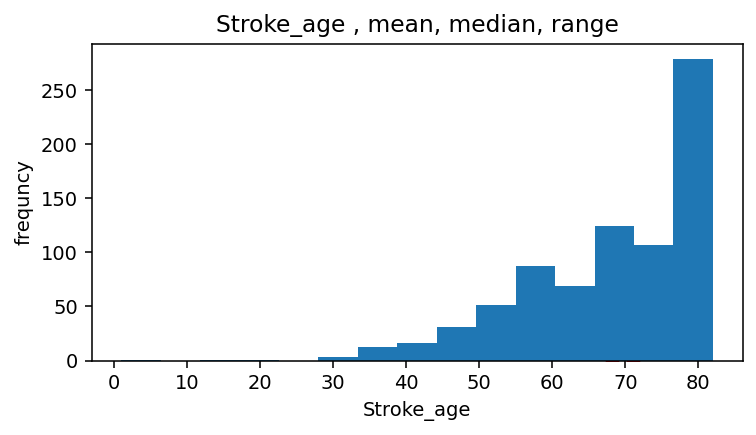

In [ ]:
# setting image resolution
plt.figure(figsize = (6,3), dpi= 140)

# plotting histogram and descriptive summary
plt.scatter(Stroke_age.mean(),0,label = 'mean', color = 'red')
plt.scatter(Stroke_age.median(),0,label = 'median', color = 'red')
plt.hist(Stroke_age, bins=15)

# axes labels
plt.xlabel('Stroke_age')
plt.ylabel('frequncy')
plt.title('Stroke_age , mean, median, range')
plt.legend

### 1.The data Stroke_age is Left skewed .

### 2.more number of People with age above 60 are having stroke.

### 3. Almost everyone in the age bracket above 75 are likely to suffer from stroke


 -

<function matplotlib.pyplot.legend>

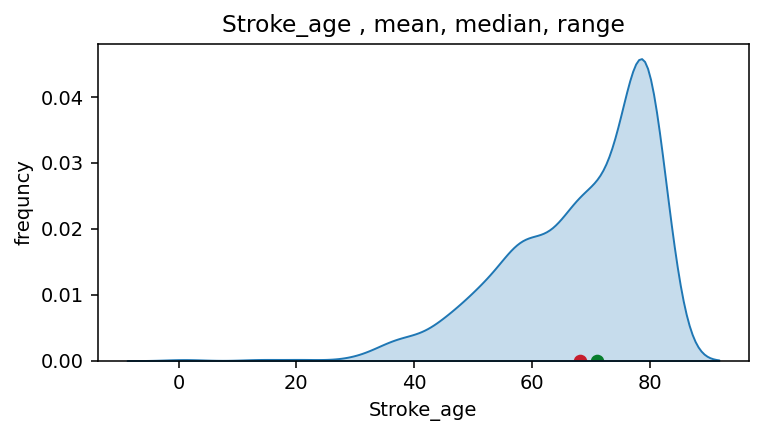

In [ ]:
# setting image resolution
plt.figure(figsize = (6,3), dpi= 140)

# plotting histogram and descriptive summary
plt.scatter(Stroke_age.mean(),0,label = 'mean', color = 'red')
plt.scatter(Stroke_age.median(),0,label = 'median', color = 'green')
sns.kdeplot(Stroke_age, shade = True)

# axes labels
plt.xlabel('Stroke_age')
plt.ylabel('frequncy')
plt.title('Stroke_age , mean, median, range')
plt.legend

<function matplotlib.pyplot.legend>

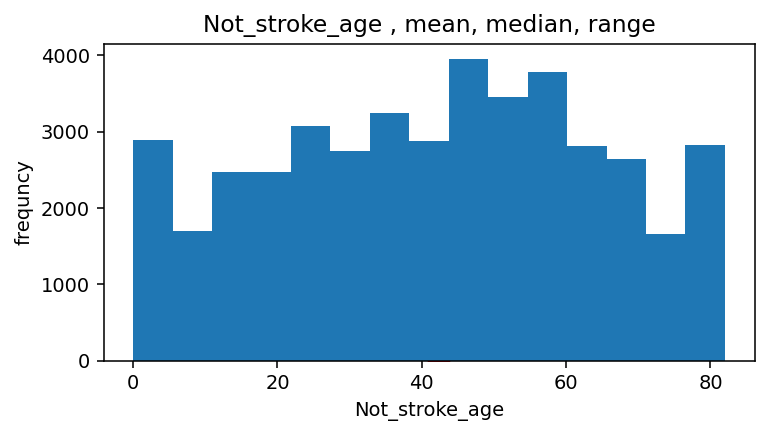

In [ ]:
plt.figure(figsize = (6,3), dpi= 140)

# plotting histogram and descriptive summary
plt.scatter(Not_stroke_age.mean(),0,label = 'mean', color = 'red')
plt.scatter(Not_stroke_age.median(),0,label = 'median', color = 'red')
plt.hist(Not_stroke_age, bins=15)

# axes labels
plt.xlabel('Not_stroke_age')
plt.ylabel('frequncy')
plt.title('Not_stroke_age , mean, median, range')
plt.legend

In [ ]:
Y_train['smoking_status'].isnull().sum()

13292

### 1.Now we want to check how many smoking people are more likely to suffer from stroke

### 2. As smoking_status is categorical data type so we cannot perform statistical operation like  *** mean , median ,  std, var

### 3. We cannot draw kde plot to visualize categorical data like 

In [ ]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

*** Univariate Analysis : Categorical Varibales***

In [ ]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


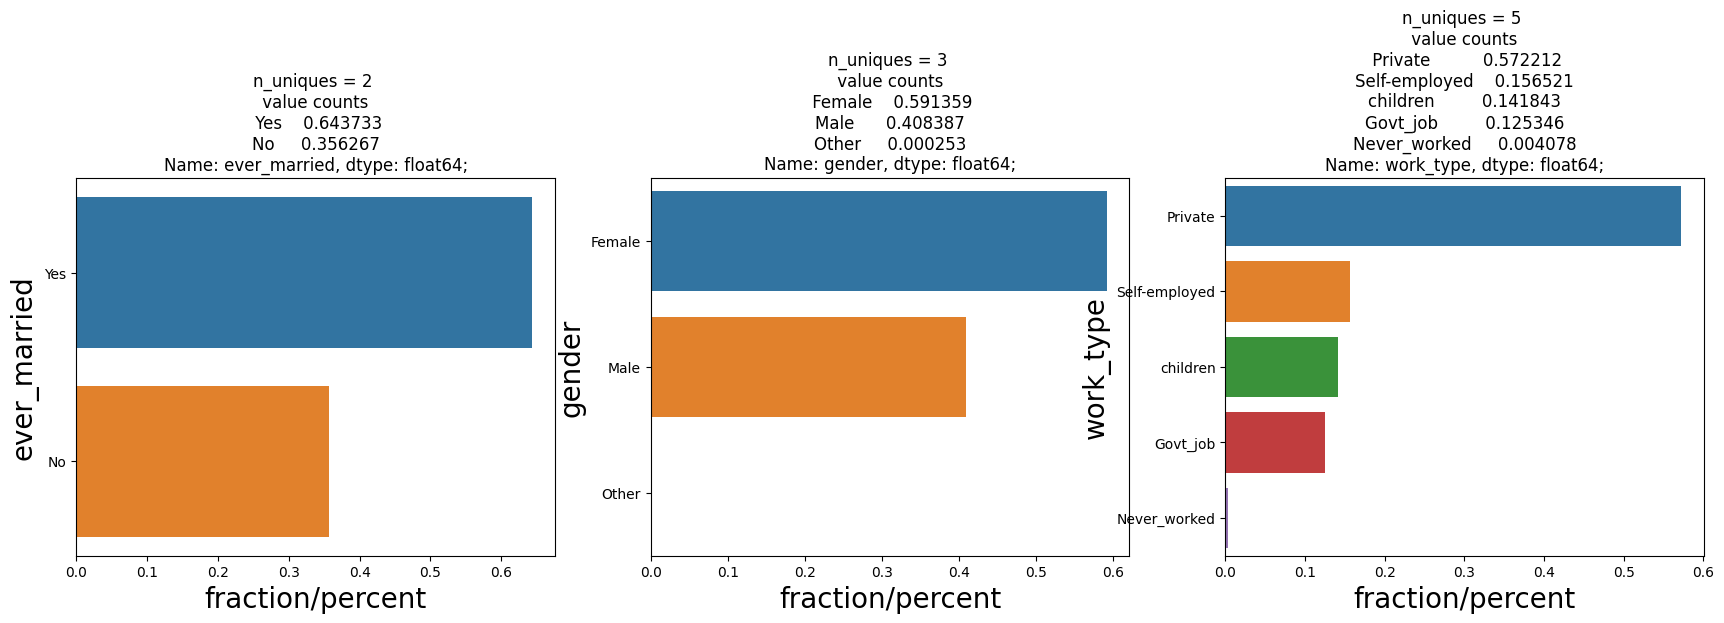

In [ ]:
UVA_category(Y_train, ['ever_married', 'gender', 'work_type'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


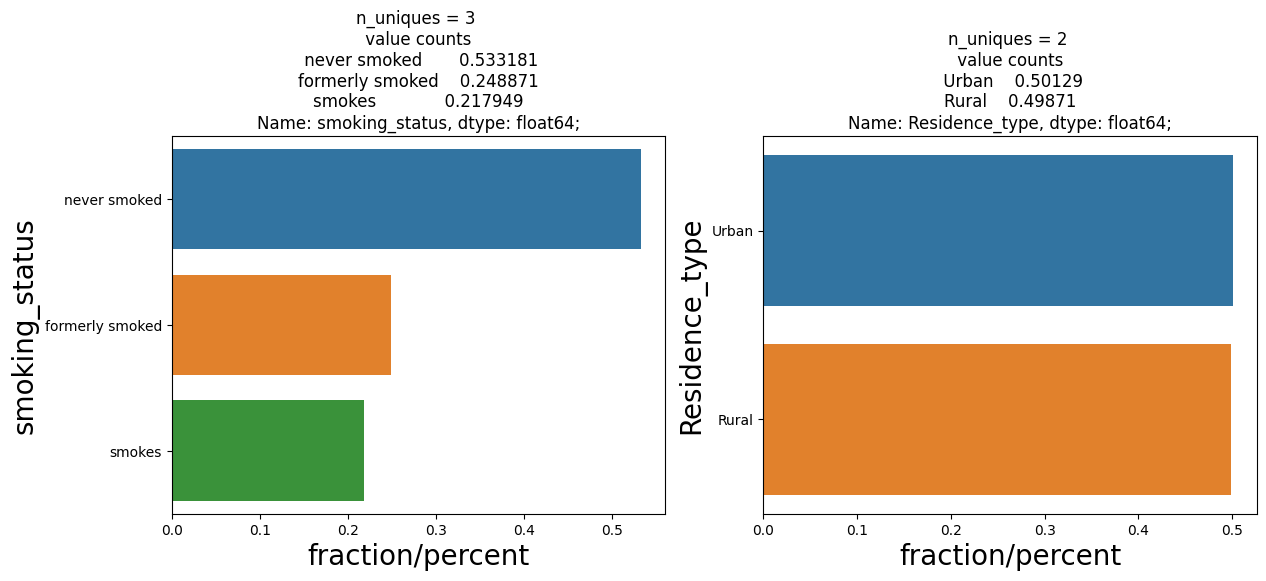

In [ ]:
UVA_category(Y_train, ['smoking_status', 'Residence_type'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


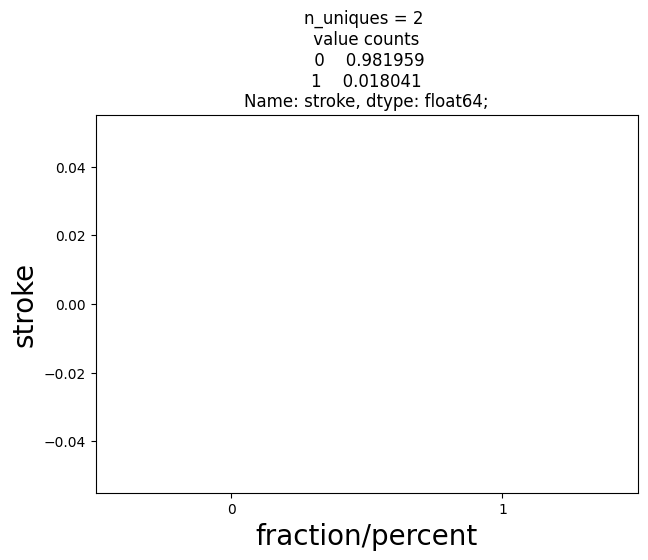

In [ ]:
UVA_category(Y_train, ['stroke'])
#UVA_numeric(Y_train, ['stroke'])

In [ ]:
Y_train['stroke']= Y_train['stroke'].astype('category')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


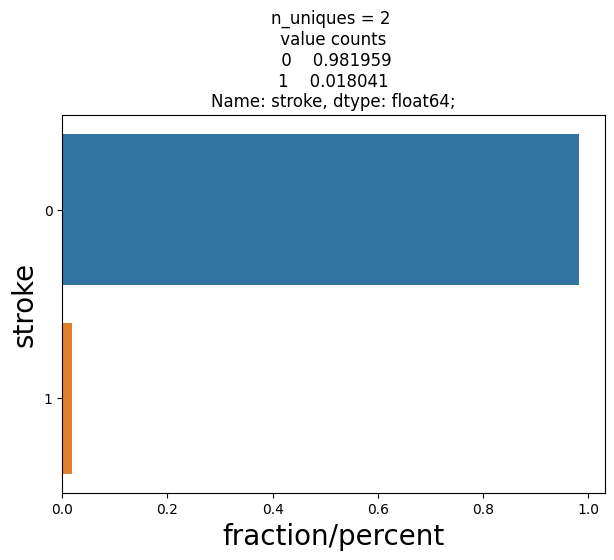

In [ ]:
UVA_category(Y_train, ['stroke'])

In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

### Bi-Variate analysis : Categorical-Categorical

In [ ]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

 ### Are Female more likely to have stroke

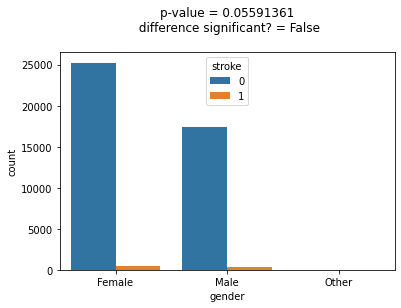

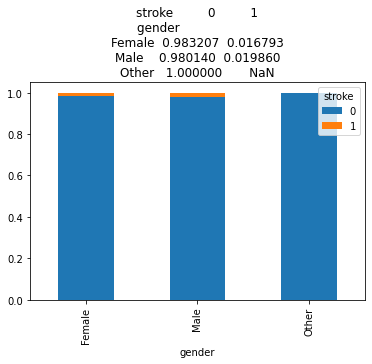

In [ ]:
BVA_categorical_plot(Y_train, 'stroke', 'gender')

In [ ]:
Y_train['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

 ### So there is no significant difference between Male and female likely to have stroke

 ### Both are equally likely to have stroke


 ### (1) Are Smokers more likly to have Stroke than non- Smokers

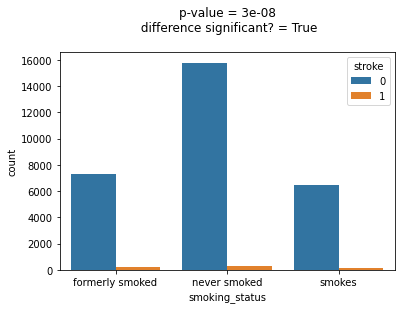

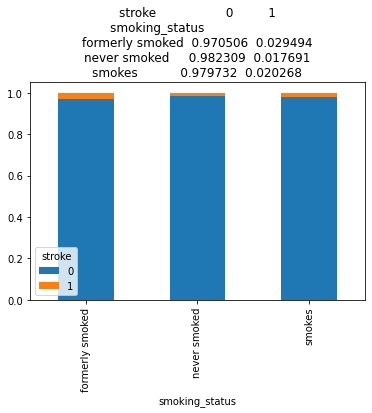

In [ ]:
BVA_categorical_plot(Y_train, 'stroke', 'smoking_status')

### 1.Our hypothesis is true Smokers are more likely to have strokes than non- smokers

### 2. We can also see from the plot that p-vale is significantly small

In [ ]:
Y_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 ### Hypothesis testing

 ### 1. Are people with hypertension more likely to have stroke



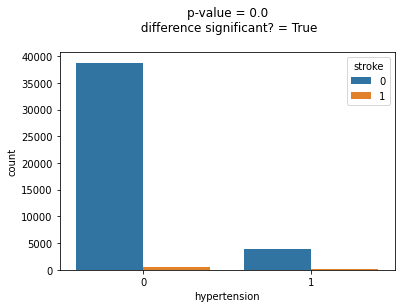

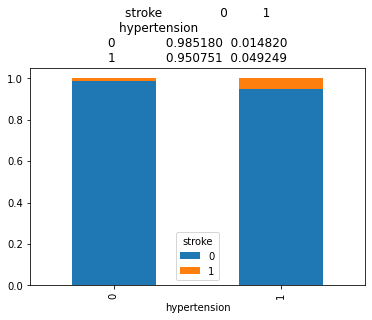

In [ ]:
BVA_categorical_plot(Y_train, 'stroke', 'hypertension')

### Yes our Hypothesis is true that people suffering from hypertension are more likely to have stroke

 *** Hypothesis Testing *** 
 ### Are people suffering from heart_disease more likely to have stroke

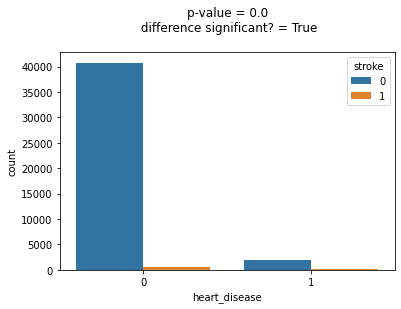

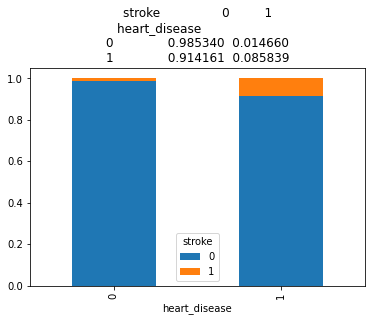

In [ ]:
BVA_categorical_plot(Y_train, 'stroke', 'heart_disease')

### Yes our Hypothesis is True that people suffering from  heart disease are more likely to have strike

*** Are ever_married more likely to have stroke***

###
*** Hypothesis testing***

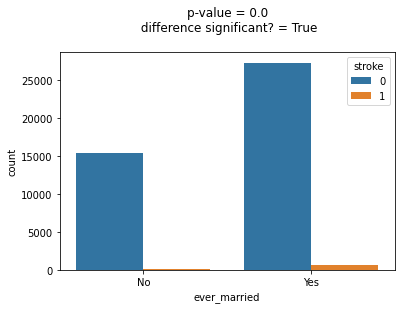

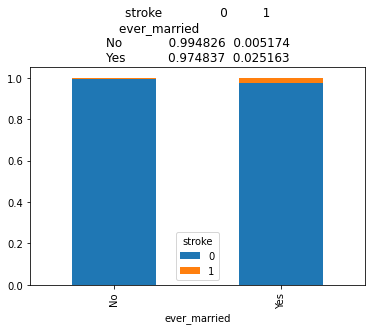

In [ ]:
BVA_categorical_plot(Y_train, 'stroke', 'ever_married')

### Yes our hypothesis is true that married  people are more likely to have stroke than un-married and the difference is significant

 ### Missing Values : Smoking_Status

In [ ]:
# isolating rows with missing smoking_status
miss_Smoke = Y_train[:]
miss_Smoke['missing_smoker'] = 'not_missing'
miss_Smoke['missing_smoker'][~miss_Smoke['smoking_status'].isin(['never smoked','formerly smoked', 'smokes'])] = 'missing value'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

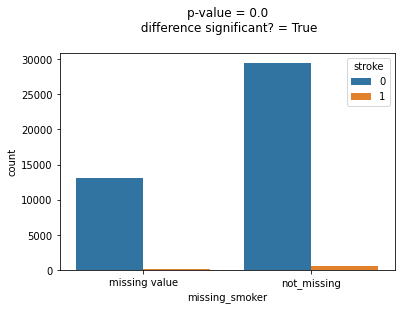

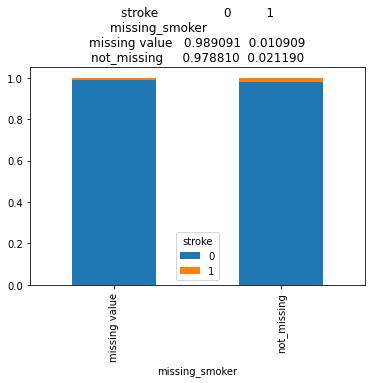

In [ ]:
BVA_categorical_plot(miss_Smoke, 'stroke', 'missing_smoker')

 ** yes There is  diffrent behaviour of the missing values in smoking_status wrt target**

In [ ]:
Y_train['work_type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [ ]:
Y_train.pivot_table('stroke', ['gender', 'work_type'], aggfunc='sum')

Empty DataFrame
Columns: []
Index: [(Female, Govt_job), (Female, Never_worked), (Female, Private), (Female, Self-employed), (Female, children), (Male, Govt_job), (Male, Never_worked), (Male, Private), (Male, Self-employed), (Male, children), (Other, Govt_job), (Other, Never_worked), (Other, Private), (Other, Self-employed), (Other, children)]

In [ ]:
age = pd.cut(Y_train['age'], [0, 25, 50, 100])
Y_train.pivot_table('stroke', ['gender', age], 'work_type', aggfunc='sum')

Empty DataFrame
Columns: []
Index: [(Female, (0, 25]), (Female, (25, 50]), (Female, (50, 100]), (Male, (0, 25]), (Male, (25, 50]), (Male, (50, 100]), (Other, (0, 25]), (Other, (25, 50]), (Other, (50, 100])]

### Creating the Dataset ready for predictive modelling

In [ ]:
train = Y_train

In [ ]:
test= X_test

In [ ]:
test['simple_mode'] = train['stroke'].mode()[0]
test['simple_mode'].head()

0    0
1    0
2    0
3    0
4    0
Name: simple_mode, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
simple_mode_accuracy = accuracy_score(test['stroke'], test['simple_mode'])
simple_mode_accuracy

KeyError: ignored